In [1]:
from datasets import load_dataset
data=load_dataset('Ateeqq/AI-and-Human-Generated-Text')


In [2]:
data

DatasetDict({
    train: Dataset({
        features: ['title', 'abstract', 'label'],
        num_rows: 22930
    })
    test: Dataset({
        features: ['title', 'abstract', 'label'],
        num_rows: 5732
    })
})

In [3]:
import pandas as pd
df_train = data["train"].to_pandas()
df_test  = data["test"].to_pandas()

df = pd.concat([df_train, df_test], ignore_index=True)


In [4]:
df.iloc[0,1]


'\n\nThis study focuses on the epigenetic inheritance of circadian period in clonal cells. In recent years, evidence has been emerging that implicates epigenetics as a fundamental factor driving cellular rhythms and other physiological processes within organisms. The findings from these studies indicate the potential for episodic changes to be maintained across generations via an inheritable memory embodied at a subcellular level by genetic mechanisms that operate independently of traditional Mendelian laws. Our investigations have used a novel approach to uncover how this inherited epigenetic component can affect the circadian periods of individual clonal cell lines over time. To achieve our objectives, we developed modified culture growth conditions combined with single-cell RNA sequencing techniques and chromatin immunoprecipitation assays to observe advances in temporal regulation patterns. These results advance our understanding of heredity from a classical genetic perspective tow

In [5]:
df.head()

,title,abstract,label
0,Epigenetic inheritance of circadian period in ...,\n\nThis study focuses on the epigenetic inher...,1
1,Pediatric Airway Stent Designed to Facilitate ...,Objective: The goal was to develop a pediatric...,0
2,Infection prevention and control in paediatric...,Transmission of infection in the paediatric of...,0
3,"Correlation between thyroid function, testoste...",STUDY DESIGN: Prospective case series. OBJECTI...,0
4,Natural intertypic and intratypic recombinants...,\n\nThis study aims to analyze the recombinant...,1


# Text Preprocessing

### Lowercasing

In [6]:
df['title']=df['title'].str.lower()
df['abstract']=df['abstract'].str.lower()

In [7]:
df.head()

,title,abstract,label
0,epigenetic inheritance of circadian period in ...,\n\nthis study focuses on the epigenetic inher...,1
1,pediatric airway stent designed to facilitate ...,objective: the goal was to develop a pediatric...,0
2,infection prevention and control in paediatric...,transmission of infection in the paediatric of...,0
3,"correlation between thyroid function, testoste...",study design: prospective case series. objecti...,0
4,natural intertypic and intratypic recombinants...,\n\nthis study aims to analyze the recombinant...,1


In [8]:
df.iloc[43,1]

'\n\nthis article examines strategies for pandemic influenza preparedness in latin america through the analysis of national strategic plans (nsp) across seven countries. the objective is to evaluate their internal organization, legal basis, financial sources and civil protection measures associated with new mitigating approaches towards managing pandemics. over the past decade latin american nations have experienced several epidemics caused by emerging and re-emerging infectious diseases such as h1n1 (2009), zika virus (2015-2016) and dengue fever disease (2018).in light of limited resources needed for response having well-organized nsps can provide an effective way to coordinate international support while responding effectively to health emergencies. as such this research aims at increasing understanding of how various countries in the region are adapting their policies regarding pandemic influenza preparedness from lessons learned during previous outbreaks allowing sustained progres

### Remove html tags

In [9]:
import re
def _remove_html(text):
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',text)

In [10]:
df['abstract']=df['abstract'].apply(_remove_html)
df['title']=df['title'].apply(_remove_html)


In [11]:
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www+\.\S+')
    return pattern.sub(r'',text)

In [12]:
df['abstract']=df['abstract'].apply(remove_url)
df['title']=df['title'].apply(remove_url)

In [13]:
df.iloc[0,1]

'\n\nthis study focuses on the epigenetic inheritance of circadian period in clonal cells. in recent years, evidence has been emerging that implicates epigenetics as a fundamental factor driving cellular rhythms and other physiological processes within organisms. the findings from these studies indicate the potential for episodic changes to be maintained across generations via an inheritable memory embodied at a subcellular level by genetic mechanisms that operate independently of traditional mendelian laws. our investigations have used a novel approach to uncover how this inherited epigenetic component can affect the circadian periods of individual clonal cell lines over time. to achieve our objectives, we developed modified culture growth conditions combined with single-cell rna sequencing techniques and chromatin immunoprecipitation assays to observe advances in temporal regulation patterns. these results advance our understanding of heredity from a classical genetic perspective tow

### Remove Punctuation

In [14]:
import string
exclude=string.punctuation

exclude+='\n'
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [15]:
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,'')
    return text
    

In [16]:
df['title']=df['title'].apply(remove_punc)
df['abstract']=df['abstract'].apply(remove_punc)
df.iloc[0,1]

'this study focuses on the epigenetic inheritance of circadian period in clonal cells in recent years evidence has been emerging that implicates epigenetics as a fundamental factor driving cellular rhythms and other physiological processes within organisms the findings from these studies indicate the potential for episodic changes to be maintained across generations via an inheritable memory embodied at a subcellular level by genetic mechanisms that operate independently of traditional mendelian laws our investigations have used a novel approach to uncover how this inherited epigenetic component can affect the circadian periods of individual clonal cell lines over time to achieve our objectives we developed modified culture growth conditions combined with singlecell rna sequencing techniques and chromatin immunoprecipitation assays to observe advances in temporal regulation patterns these results advance our understanding of heredity from a classical genetic perspective toward one guid

## Stopword removal

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') 

[nltk_data] Downloading package stopwords to C:\Users\vivek
[nltk_data]     kamath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\vivek
[nltk_data]     kamath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\vivek
[nltk_data]     kamath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
import pandas as pd

stop_words = set(stopwords.words('english'))

def remove_stopwords_fast(text):
    if pd.isna(text):
        return text
    return " ".join([word for word in text.split() if word not in stop_words])

df['title'] = df['title'].apply(remove_stopwords_fast)
df['abstract'] = df['abstract'].apply(remove_stopwords_fast)



In [19]:
df.iloc[0,1]

'study focuses epigenetic inheritance circadian period clonal cells recent years evidence emerging implicates epigenetics fundamental factor driving cellular rhythms physiological processes within organisms findings studies indicate potential episodic changes maintained across generations via inheritable memory embodied subcellular level genetic mechanisms operate independently traditional mendelian laws investigations used novel approach uncover inherited epigenetic component affect circadian periods individual clonal cell lines time achieve objectives developed modified culture growth conditions combined singlecell rna sequencing techniques chromatin immunoprecipitation assays observe advances temporal regulation patterns results advance understanding heredity classical genetic perspective toward one guided intricate transcriptional networks modulated covalent histone modifications associated rhythmic behaviour nongenetically identical daughter cells derived common parent line greate

## Tokenization

In [20]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [21]:
def tokenize_text(text):
    if pd.isna(text):
        return []
    return word_tokenize(text)

df['title'] = df['title'].apply(tokenize_text)
df['abstract'] = df['abstract'].apply(tokenize_text)

In [22]:
type(df["title"].iloc[0])

list

In [23]:
df["title"]     
df["abstract"]  


0        [study, focuses, epigenetic, inheritance, circ...
1        [objective, goal, develop, pediatric, airway, ...
2        [transmission, infection, paediatric, office, ...
3        [study, design, prospective, case, series, obj...
4        [study, aims, analyze, recombinant, patterns, ...
                               ...                        
28657    [article, investigates, potential, value, eval...
28658    [paper, presents, qualitative, analysis, incom...
28659    [simple, summary, plants, leaves, specialized,...
28660    [recent, advances, carbohydrate, chemistry, bi...
28661    [pandemic, influenza, h1n1, winter, influenza,...
Name: abstract, Length: 28662, dtype: object

In [24]:
from nltk.stem.porter import PorterStemmer

### Stemming

In [25]:
ps = PorterStemmer()

In [26]:
def porter_stem_tokens(tokens):
    if not isinstance(tokens, list):
        return tokens
    return [ps.stem(word) for word in tokens]

df['title'] = df['title'].apply(porter_stem_tokens)
df['abstract'] = df['abstract'].apply(porter_stem_tokens)


In [27]:
df['abstract']


0        [studi, focus, epigenet, inherit, circadian, p...
1        [object, goal, develop, pediatr, airway, stent...
2        [transmiss, infect, paediatr, offic, issu, inc...
3        [studi, design, prospect, case, seri, object, ...
4        [studi, aim, analyz, recombin, pattern, entero...
                               ...                        
28657    [articl, investig, potenti, valu, evalu, ee, ’...
28658    [paper, present, qualit, analysi, incomegener,...
28659    [simpl, summari, plant, leav, special, organ, ...
28660    [recent, advanc, carbohydr, chemistri, biochem...
28661    [pandem, influenza, h1n1, winter, influenza, s...
Name: abstract, Length: 28662, dtype: object

## Word Cloud Visualisatiom

In [28]:
from itertools import chain

human_tokens = list(
    chain.from_iterable(df[df["label"] == 0]["abstract"].dropna())
)

ai_tokens = list(
    chain.from_iterable(df[df["label"] == 1]["abstract"].dropna())
)




In [29]:
from collections import Counter

human_freq = Counter(human_tokens)
ai_freq = Counter(ai_tokens)


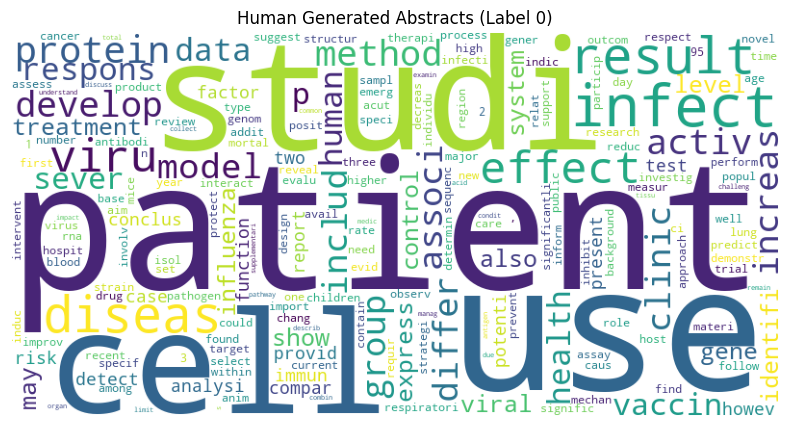

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_human = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200
).generate_from_frequencies(human_freq)

plt.figure(figsize=(12,5))
plt.imshow(wc_human)
plt.axis("off")
plt.title("Human Generated Abstracts (Label 0)")
plt.show()


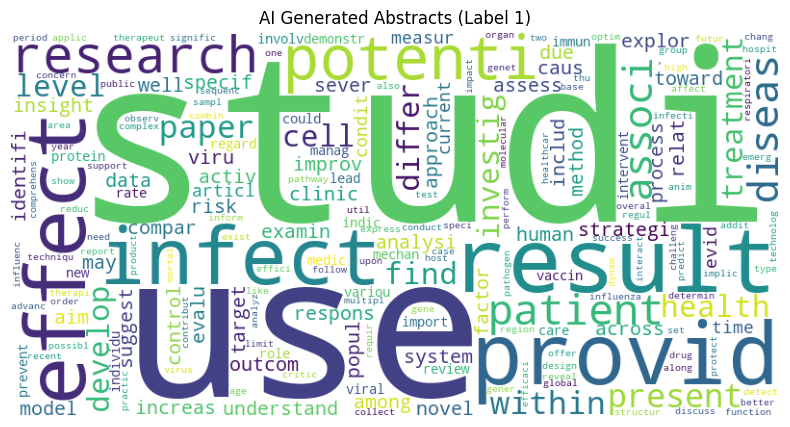

In [31]:
wc_ai = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=200
).generate_from_frequencies(ai_freq)

plt.figure(figsize=(12,5))
plt.imshow(wc_ai)
plt.axis("off")
plt.title("AI Generated Abstracts (Label 1)")
plt.show()
